c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Program Files\Python310\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

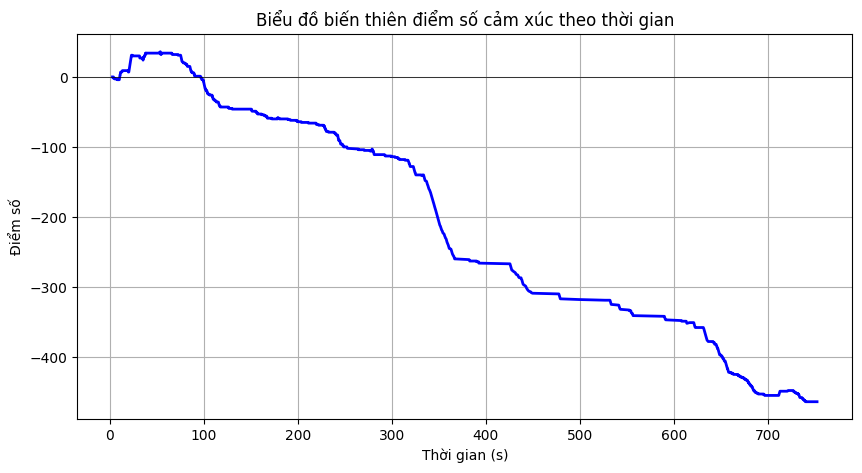

In [ ]:
import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import time
# Load model và file cascade
model = load_model("D:\\faceemotionproject\\facialemotionmodel.h5")
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)
# Hàm tiền xử lý ảnh
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0
# Cấu hình webcam và biến đếm
webcam = cv2.VideoCapture(0)
score = 0
score_history = []
time_history = []
start_time = time.time()
labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
while True:
    ret, im = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (p, q, r, s) in faces:
        image = gray[q:q+s, p:p+r]
        cv2.rectangle(im, (p, q), (p+r, q+s), (255, 0, 0), 2)
        image = cv2.resize(image, (48, 48))
        img = extract_features(image)
        pred = model.predict(img)
        prediction_label = labels[pred.argmax()]
        cv2.putText(im, prediction_label, (p-10, q-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))
        # Cập nhật điểm số
        if prediction_label in ['Happy', 'Surprise']:
            score += 1
        elif prediction_label in ['Angry', 'Sad','Fear','Disgust']:
            score -= 1
        # Thêm dữ liệu cho biểu đồ
        score_history.append(score)
        time_history.append(time.time() - start_time)
    # Hiển thị webcam
    cv2.imshow("Output", im)
    # Thoát vòng lặp
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()
# Vẽ biểu đồ sau khi thoát
plt.figure(figsize=(10, 5))
plt.plot(time_history, score_history, color='blue', linewidth=2)
plt.title("Biểu đồ biến thiên điểm số cảm xúc theo thời gian")
plt.xlabel("Thời gian (s)")
plt.ylabel("Điểm số")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)  # Đường trục 0
plt.show()
